In [1]:
from tensorflow.keras.layers import Conv2D,Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow .keras.optimizers import Adam,SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
import warnings
warnings.filterwarnings('ignore')

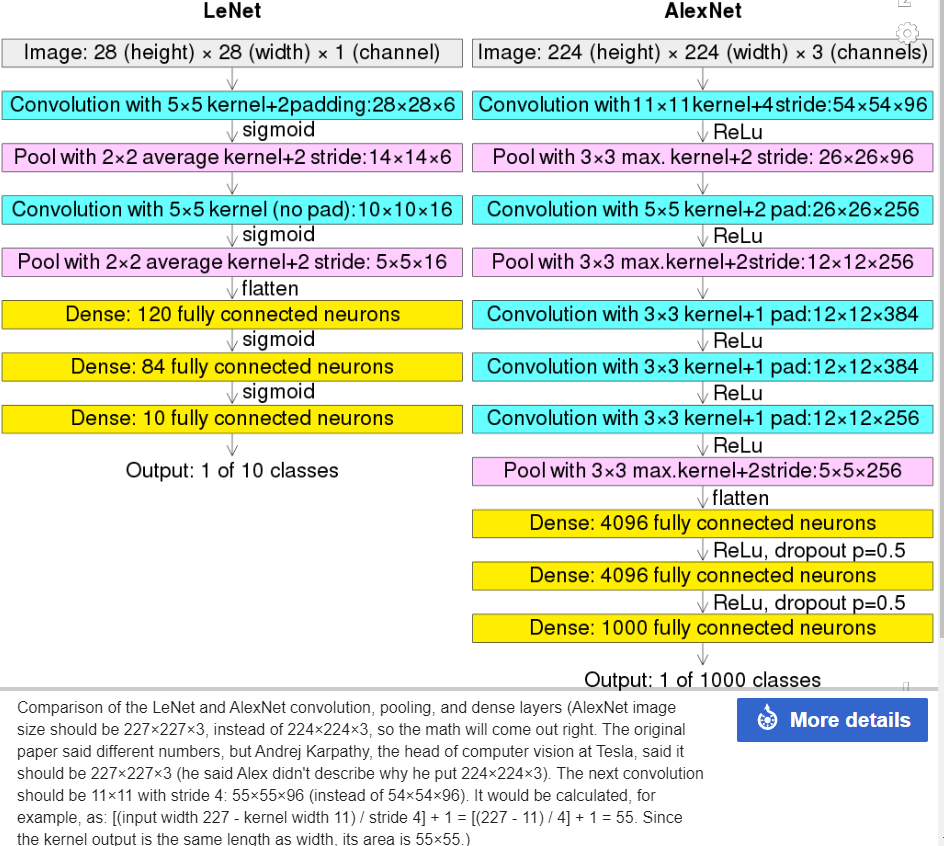

In [2]:
model=Sequential()
#first or input layer
model.add(Conv2D(96,kernel_size=(11,11),padding='valid',strides=(4,4),input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid'))
model.add(BatchNormalization())

#second conv layer
model.add(Conv2D(256,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),padding='valid',strides=(2,2)))
model.add(BatchNormalization())

#third conv layer
model.add(Conv2D(384,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(BatchNormalization())

#fourth conv layer
model.add(Convolution2D(384,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))

model.add(BatchNormalization())

#fivth conv layer
model.add(Convolution2D(256,kernel_size=(3,3),padding='valid',strides=(1,1),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(BatchNormalization())

#Flatten layer
model.add(Flatten())

#Dense layer 1
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Dense layer 2
model.add(Dense(4096,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Dense layer 3
model.add(Dense(1000,activation='relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

#Final layer
model.add(Dense(2,activation='softmax'))


2022-12-08 02:52:34.296674: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 02:52:34.297767: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 02:52:34.484520: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 02:52:34.485467: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-08 02:52:34.486324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 25, 25, 256)       221440    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 384)       8

In [4]:
model.compile(optimizer=SGD(learning_rate=0.001,momentum=0.9,decay=0.005),
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [5]:
datasets_directory="/kaggle/input/cats-and-dogs-image-classification-data/dataset"

In [6]:
batch_size=128

In [7]:
train_dataGenerator=ImageDataGenerator(rescale=1./255,
                                      shear_range=0.2,
                                      zoom_range=0.2,
                                      width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      fill_mode='nearest')

validation_dataGenerator=ImageDataGenerator(rescale=1./255)

In [8]:
trainDatasets=train_dataGenerator.flow_from_directory(datasets_directory+'/training_set',target_size=(224,224),
                                                     batch_size=batch_size,
                                                     class_mode='binary')
validationDatasets=validation_dataGenerator.flow_from_directory(datasets_directory+'/test_set',
                                                               target_size=(224,224),
                                                               batch_size=batch_size,
                                                               class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [9]:
classInformation=trainDatasets.class_indices
print("Class Information: {}".format(classInformation))
classes=list(classInformation)
print("Class Names:{}".format(classes))

Class Information: {'cats': 0, 'dogs': 1}
Class Names:['cats', 'dogs']


In [10]:
classSamplesT=trainDatasets.samples
print("Training Class Samples:{}".format(classSamplesT))
classSamplesV=validationDatasets.samples
print("Validation Class Samples:{}".format(classSamplesV))



Training Class Samples:8000
Validation Class Samples:2000


In [11]:
weghtPath="best_weights_9.hdf5"
checkPoint=ModelCheckpoint(filepath="weghtPath",monitor='val_acc',verbose=1,save_best_only=True,save_weights_only=True,mode="max")
callBacksList=[checkPoint]

In [12]:
history=model.fit(trainDatasets,steps_per_epoch=classSamplesT//batch_size,
                 validation_data=validationDatasets,
                 epochs=20,
                 validation_steps=classSamplesV//batch_size,
                 callbacks=callBacksList)

2022-12-08 02:52:44.231028: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20


2022-12-08 02:52:49.649777: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


62/62 [==============================] - 191s 3s/step - loss: 0.9486 - accuracy: 0.5452 - val_loss: 0.7048 - val_accuracy: 0.4984
Epoch 2/20
62/62 [==============================] - 132s 2s/step - loss: 0.8432 - accuracy: 0.5647 - val_loss: 0.7035 - val_accuracy: 0.5089
Epoch 3/20
62/62 [==============================] - 128s 2s/step - loss: 0.7821 - accuracy: 0.5901 - val_loss: 0.6773 - val_accuracy: 0.5766
Epoch 4/20
62/62 [==============================] - 129s 2s/step - loss: 0.7476 - accuracy: 0.5943 - val_loss: 0.6608 - val_accuracy: 0.5974
Epoch 5/20
62/62 [==============================] - 127s 2s/step - loss: 0.7304 - accuracy: 0.5948 - val_loss: 0.6409 - val_accuracy: 0.6245
Epoch 6/20
62/62 [==============================] - 128s 2s/step - loss: 0.7022 - accuracy: 0.6115 - val_loss: 0.6409 - val_accuracy: 0.6354
Epoch 7/20
62/62 [==============================] - 129s 2s/step - loss: 0.6863 - accuracy: 0.6200 - val_loss: 0.6173 - val_accuracy: 0.6583
Epoch 8/20
62/62 [======